In [ ]:
!pip install -q yfinance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential, load_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
#df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df.describe()
# apple = index 1:1259
#google = index 1260:2517 
#microsoft = index 2518:3775
#amazon = index 3776:5033

,Open,High,Low,Close,Adj Close,Volume
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1.004000e+03
mean,154.579824,156.775112,152.545468,154.753145,154.381947,5.278256e+07
std,63.459766,64.067227,62.840333,63.524932,63.076805,3.193163e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,8.567800e+06
25%,103.947498,105.901249,102.438873,104.280003,104.280003,2.665858e+07
50%,133.980003,135.860001,132.130005,133.709999,133.709999,4.601100e+07
75%,184.700001,187.214996,183.197495,184.475002,183.774982,7.056310e+07
max,296.700012,305.170013,295.269989,304.829987,304.829987,2.726620e+08


In [ ]:
df = AAPL
stock_name = "AAPLE"
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,149.300558,151.348645,147.512948,149.548566,149.179334,7.931483e+07
std,10.692749,10.573966,10.882891,10.797309,10.801661,2.507064e+07
min,126.010002,127.769997,124.169998,125.019997,124.829399,3.519590e+07
25%,142.110001,143.854996,139.949997,142.464996,141.973434,6.373075e+07
50%,148.869995,150.919998,147.240005,149.350006,148.910004,7.406430e+07
75%,156.555000,158.154999,154.164993,156.844994,156.238129,8.858415e+07
max,173.750000,176.149994,173.119995,174.550003,173.995270,1.826020e+08


In [ ]:
df.reset_index()
df.head
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name'], dtype='object')

In [ ]:
#dropping all the columns we do not need
#df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-04-28,159.250000,164.520004,158.929993,163.639999,162.654678,130216800,APPLE
2022-04-29,161.839996,166.199997,157.250000,157.649994,156.700745,131747600,APPLE
2022-05-02,156.710007,158.229996,153.270004,157.960007,157.008881,123055300,APPLE
2022-05-03,158.149994,160.710007,156.320007,159.479996,158.519730,88966500,APPLE
2022-05-04,159.669998,166.479996,159.259995,166.020004,165.020355,108256500,APPLE


In [ ]:
#Plotting the raw data of the close column
plt.figure(figsize=(10, 100))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.plot(df.Close)
plt.ylabel('Adj Close')
plt.xlabel('Year')
plt.title(f"Closing Price of {stock_name}")

Text(0.5, 1.0, 'Stock Price with Moving Averages')

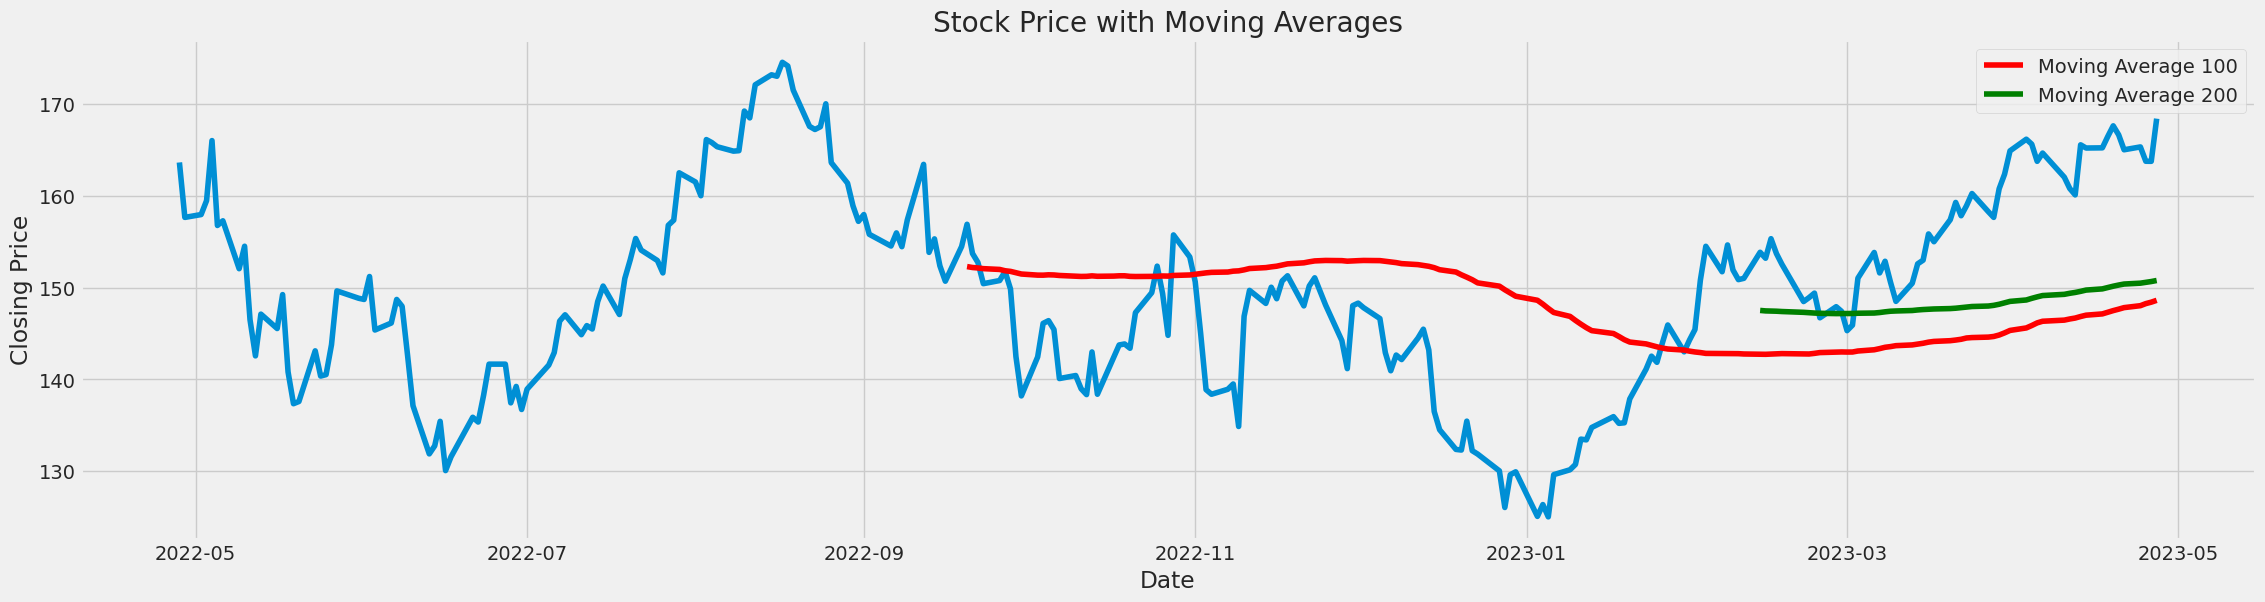

In [ ]:
#Plotting the MA 100+200
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()
plt.figure(figsize= (25, 100))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.plot(df.Close)
plt.plot(ma100, 'r', label='Moving Average 100')
plt.plot(ma200, 'g', label='Moving Average 200')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price with Moving Averages')

In [ ]:
#Splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0 : int(len(df)*0.7)]) 
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7) : int(len(df))]) 


In [ ]:
#Scaling the data 
scaler = MinMaxScaler(feature_range= (0,1))
data_training_array = scaler.fit_transform(data_training)


In [ ]:
#splitting into x train and y train 
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#ML Model 
#LSTM

In [ ]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
3/3 [==============================] - 7s 265ms/step - loss: 0.1413
Epoch 2/50
3/3 [==============================] - 1s 268ms/step - loss: 0.0993
Epoch 3/50
3/3 [==============================] - 1s 267ms/step - loss: 0.0399
Epoch 4/50
3/3 [==============================] - 1s 265ms/step - loss: 0.0489
Epoch 5/50
3/3 [==============================] - 1s 261ms/step - loss: 0.0255
Epoch 6/50
3/3 [==============================] - 1s 278ms/step - loss: 0.0341
Epoch 7/50
3/3 [==============================] - 1s 271ms/step - loss: 0.0324
Epoch 8/50
3/3 [==============================] - 1s 264ms/step - loss: 0.0263
Epoch 9/50
3/3 [==============================] - 1s 265ms/step - loss: 0.0233
Epoch 10/50
3/3 [==============================] - 1s 456ms/step - loss: 0.0247
Epoch 11/50
3/3 [==============================] - 1s 459ms/step - loss: 0.0293
Epoch 12/50
3/3 [==============================] - 1s 278ms/step - loss: 0.0219
Epoch 13/50
3/3 [==============================] 

In [ ]:
#Save the model for future use 
model.save('Keras_Model')

In [ ]:
past_100 = data_training.head(100)
final_df = past_100.append(data_testing, ignore_index =True)


<ipython-input-59-6a898d5071f8>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100.append(data_testing, ignore_index =True)


In [ ]:
final_df.head()

,Close
0,163.639999
1,157.649994
2,157.960007
3,159.479996
4,166.020004


In [ ]:
input_data = scaler.fit_transform(final_df)
#input_data

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100 : i])
  y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
#Making predictions
y_predicted = model.predict(x_test)


3/3 [==============================] - 1s 71ms/step


In [ ]:
scale_factor = 1 / scaler.scale_
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

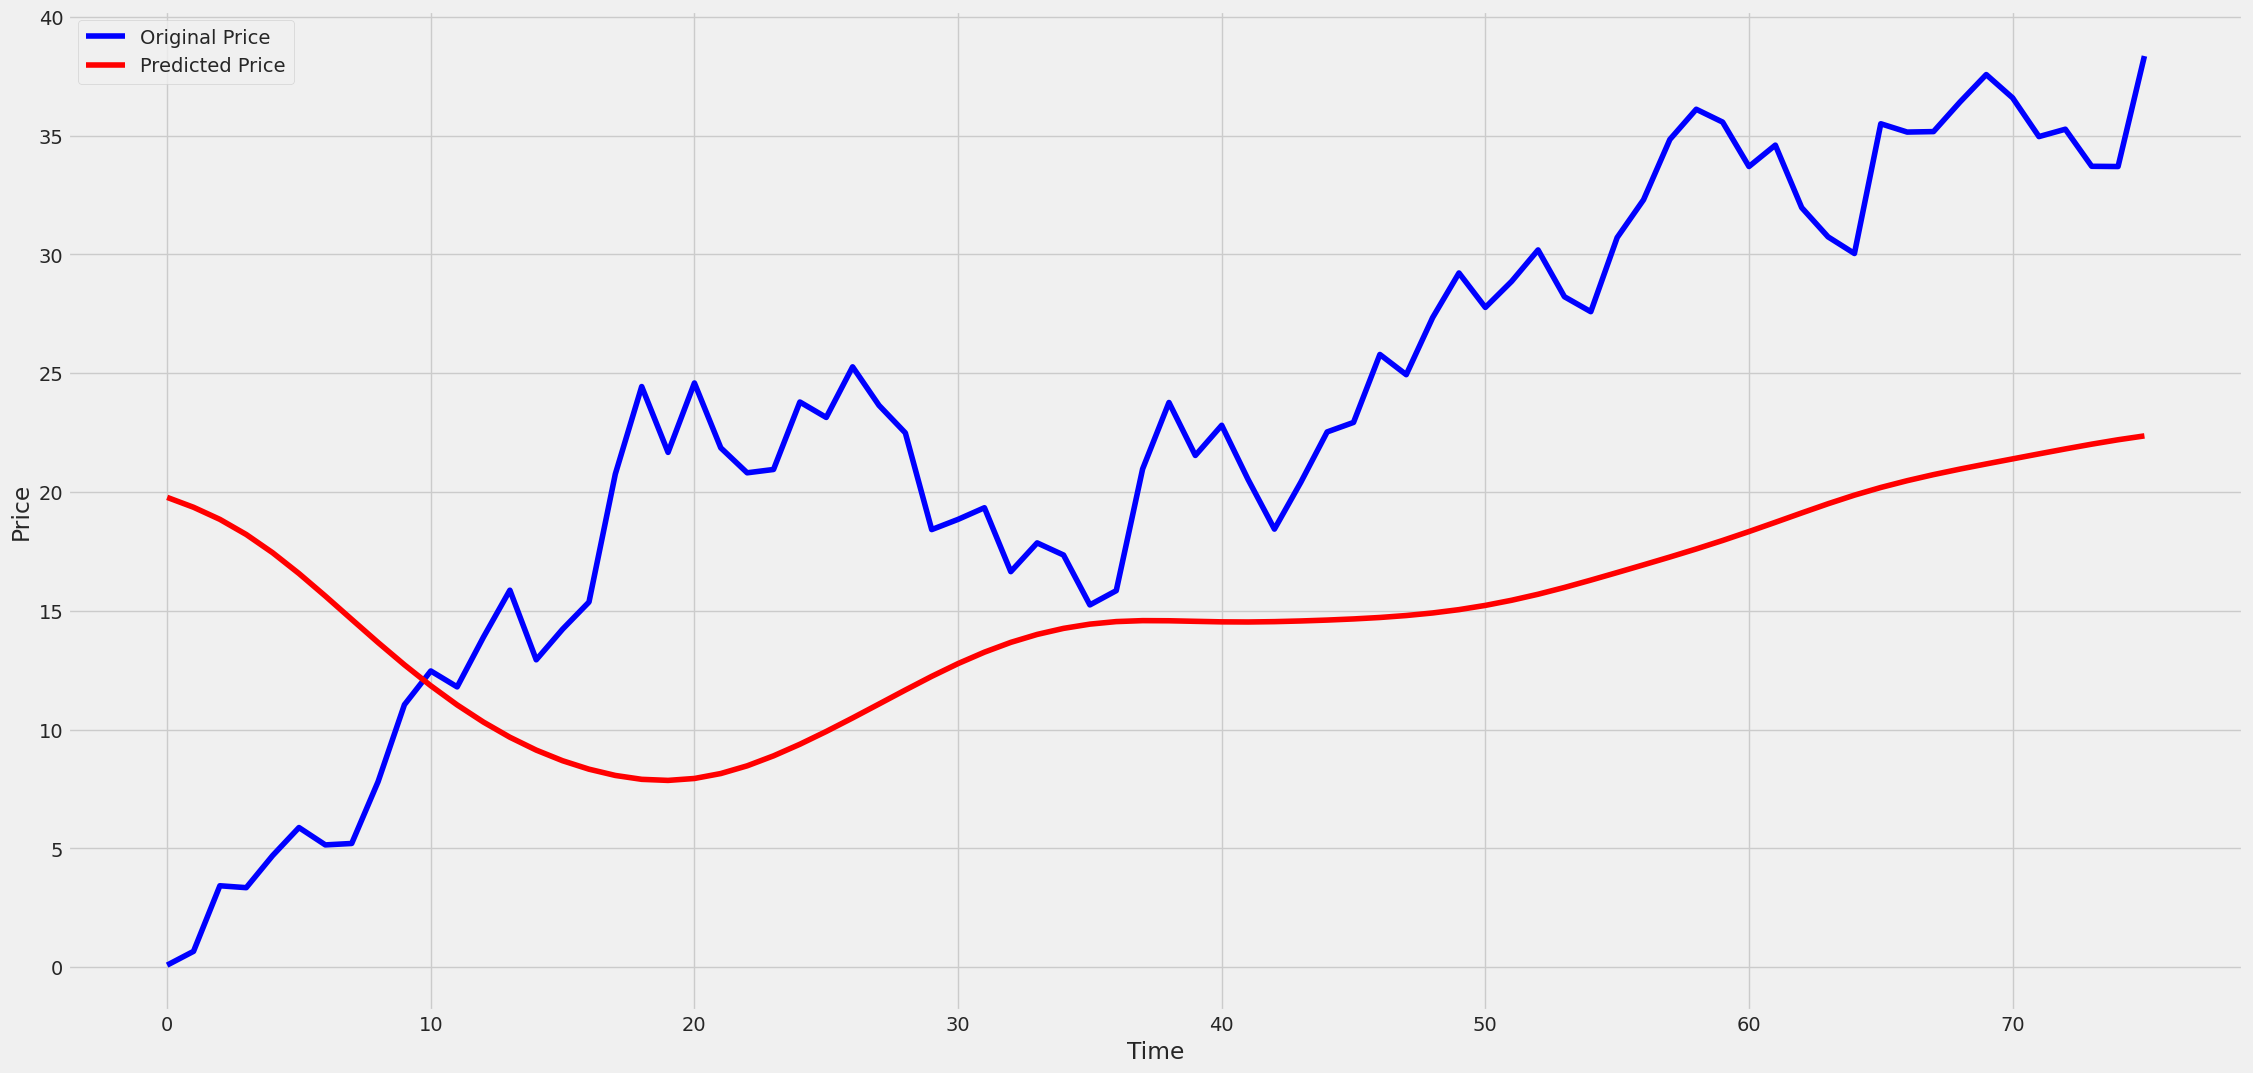

In [ ]:
plt.figure(figsize= (25,200))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.plot(y_test, 'b', label= 'Original Price')
plt.plot(y_predicted, 'r', label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_predicted)
rmse = mean_squared_error(y_test, y_predicted, squared=False)

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 112.79023617307281
RMSE: 113.50521323613197
